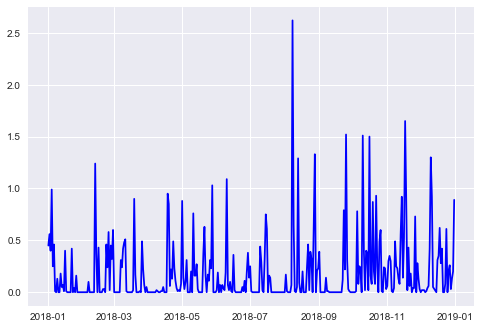

In [11]:
# 5-1
import csv

from datetime import datetime
import matplotlib.pyplot as plt

filename = 'data/sitka_weather_2018_simple.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader)
    
    dates, drops = [], []
    for row in reader:
        current_date = datetime.strptime(row[2], '%Y-%m-%d')
        dates.append(current_date)
        drop = float(row[3])
        drops.append(drop)

plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, drops, c="blue")

plt.show()

Missing data for 2018-02-18 00:00:00


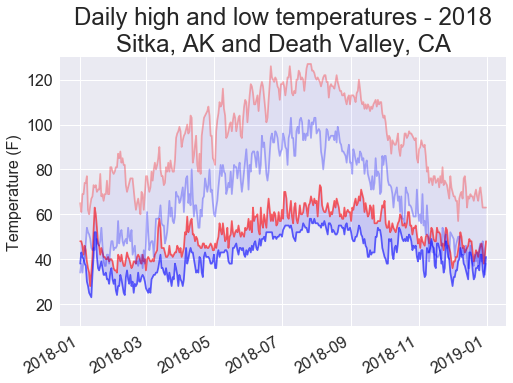

In [12]:
# 5-2
import csv
from datetime import datetime
from matplotlib import pyplot as plt

def get_weather_data(filename, dates, highs, lows, date_index, high_index,
                     low_index):
    """ファイルから最高気温と最低気温を取得する"""
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        # ファイルから日付、最高気温、最低気温を取得する
        for row in reader:
            current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
            try:
                high = int(row[high_index])
                low = int(row[low_index])
            except ValueError:
                print(f"Missing data for {current_date}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

# シトカの天気データを取得する
filename = 'data/sitka_weather_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=5,
                 low_index=6)

# シトカの天気データをグラフに描画する
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.6)
ax.plot(dates, lows, c='blue', alpha=0.6)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.15)

# デス・バレーの天気データを取得する
filename = 'data/death_valley_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=4, low_index=5)

# デス・バレーの天気データを現在のグラフに描画する
ax.plot(dates, highs, c='red', alpha=0.3)
ax.plot(dates, lows, c='blue', alpha=0.3)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)

# グラフにフォーマットを指定する
title = "Daily high and low temperatures - 2018"
title += "\nSitka, AK and Death Valley, CA"
plt.title(title, fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(10, 130)

plt.show()

In [ ]:
# 5-3
